In [2]:
import pandas as pd
import numpy as np

# Below option allows us to see the entire comment_text column
pd.set_option('display.max_colwidth', None)
# Read in the dataset
train = pd.read_csv("../data/kaggle_train.csv")
train = train.drop(columns=['id'])

labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

print("Stats of training set: ", train.shape)
print("Labels:", labels)

Stats of training set:  (159571, 7)
Labels: ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [3]:
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"Explanation\r\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""\r\nMore\r\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0


# Text Preprocessing

Below I have noticed some inconsistencies in the data and by preprocessing it, we can ensure a clean dataset.

In [4]:
# Convert comment to lowercase
def to_lowercase(text):
    return text.lower()

train['comment_text'] = train['comment_text'].apply(to_lowercase)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"explanation\r\nwhy the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27",0,0,0,0,0,0
1,"d'aww! he matches this background colour i'm seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)",0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. he seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""\r\nmore\r\ni can't make any real suggestions on improvement - i wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -i think the references may need tidying so that they are all in the exact same format ie date format etc. i can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nthere appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up. it's listed in the relevant form eg wikipedia:good_article_nominations#transport """,0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember what page that's on?",0,0,0,0,0,0


In [5]:
import re
# Remove HTML tags from the comments
def remove_html(text):
    return re.sub(r"<.*>", "", text, flags=re.MULTILINE)
    
train['comment_text'] = train['comment_text'].apply(remove_html)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"explanation\r\nwhy the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27",0,0,0,0,0,0
1,"d'aww! he matches this background colour i'm seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)",0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. he seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""\r\nmore\r\ni can't make any real suggestions on improvement - i wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -i think the references may need tidying so that they are all in the exact same format ie date format etc. i can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nthere appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up. it's listed in the relevant form eg wikipedia:good_article_nominations#transport """,0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember what page that's on?",0,0,0,0,0,0


In [6]:
# Remove links from the comments
def remove_links(text):
    text= re.sub(r"http\S+"," ",text, flags=re.MULTILINE)
    return re.sub(r"www\S+"," ",text, flags=re.MULTILINE)

train['comment_text'] = train['comment_text'].apply(remove_links)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"explanation\r\nwhy the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now.89.205.38.27",0,0,0,0,0,0
1,"d'aww! he matches this background colour i'm seemingly stuck with. thanks. (talk) 21:51, january 11, 2016 (utc)",0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. he seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,"""\r\nmore\r\ni can't make any real suggestions on improvement - i wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -i think the references may need tidying so that they are all in the exact same format ie date format etc. i can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\r\n\r\nthere appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up. it's listed in the relevant form eg wikipedia:good_article_nominations#transport """,0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember what page that's on?",0,0,0,0,0,0


In [7]:
import string
# Remove punctuation marks 
def remove_punctuation(text):
    for i in string.punctuation:
        text = text.replace(i, "")
    return text

train['comment_text'] = train['comment_text'].apply(remove_punctuation)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation\r\nwhy the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired now892053827,0,0,0,0,0,0
1,daww he matches this background colour im seemingly stuck with thanks talk 2151 january 11 2016 utc,0,0,0,0,0,0
2,hey man im really not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0
3,\r\nmore\r\ni cant make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first if you have any preferences for formatting style on references or want to do it yourself please let me know\r\n\r\nthere appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up its listed in the relevant form eg wikipediagoodarticlenominationstransport,0,0,0,0,0,0
4,you sir are my hero any chance you remember what page thats on,0,0,0,0,0,0


In [8]:
# Remove special characters such as: \n \r \t
def remove_special(text):
    return re.sub(r"[\n\t\\\/\r]"," ",text, flags=re.MULTILINE)

train['comment_text'] = train['comment_text'].apply(remove_special)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since im retired now892053827,0,0,0,0,0,0
1,daww he matches this background colour im seemingly stuck with thanks talk 2151 january 11 2016 utc,0,0,0,0,0,0
2,hey man im really not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0
3,more i cant make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up its listed in the relevant form eg wikipediagoodarticlenominationstransport,0,0,0,0,0,0
4,you sir are my hero any chance you remember what page thats on,0,0,0,0,0,0


In [9]:
# Remove stopwords using nltk's stopwords package
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
train.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andrew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired now892053827,0,0,0,0,0,0
1,daww matches background colour im seemingly stuck thanks talk 2151 january 11 2016 utc,0,0,0,0,0,0
2,hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info,0,0,0,0,0,0
3,cant make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later noone else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipediagoodarticlenominationstransport,0,0,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0,0,0


In [10]:
# As you can see above, there are numbers and/or dates
# I will remove those as they are not helpful

def remove_numbers(text):
    return re.sub(r'\d'," ",text, flags=re.MULTILINE)

train['comment_text'] = train['comment_text'].apply(remove_numbers)
train.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired now,0,0,0,0,0,0
1,daww matches background colour im seemingly stuck thanks talk january utc,0,0,0,0,0,0
2,hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info,0,0,0,0,0,0
3,cant make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later noone else first preferences formatting style references want please let know appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipediagoodarticlenominationstransport,0,0,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0,0,0


# Train, Test, and Validation Split

Below I need to split the dataset into train and test datasets.
However, sklearn's `train_test_split` function does not work for
multi-class classification.

Therefore, I will be creating a train, test, and validation split for each label in the classification.

In [11]:
from sklearn.model_selection import train_test_split

splits = {
    "toxic": {},
    "severe_toxic": {},
    "obscene": {},
    "threat": {},
    "insult": {},
    "identity_hate": {}
}

for label in labels:

    X = train[['comment_text']].values
    Y = train[[label]].values

    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)

    splits[label]['train'] = [X_train, y_train]
    splits[label]['test'] = [X_test, y_test]


 Since there is no built-in function to extract a validation set from a training set, we will use the same method as above to create a validation set.

In [12]:
for label in labels:

    X = splits[label]['train'][0]
    Y = splits[label]['train'][1]

    X_train, X_validation, y_train, y_validation = train_test_split(X,Y,test_size=0.10)

    splits[label]['train'] = [X_train, y_train]
    splits[label]['validation'] = [X_validation, y_validation]


However, this will not create a 70:20-10 split as we are splitting 105% from the already split 70%, which is roughly 8%.

This results in the following split:

72% training 
20% test
8% validation

In [13]:
print("Train shape:", splits['toxic']['train'][0].shape)
print("Test shape:", splits['toxic']['test'][0].shape)
print("Validation shape:", splits['toxic']['validation'][0].shape)

Train shape: (114890, 1)
Test shape: (31915, 1)
Validation shape: (12766, 1)


# Vectorizing the Comment Text

*Logistic Regression can't take text values as input*

Since the independent variable I have is only text, we will need to use a vectorizer to convert the text into usable data for Logistic Regression.

```

# Max_features = Build a vocabulary that only consider the top max_features ordered by term frequency

# Analyzer = Whether the feature should be made of word or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.

# ngram_range = (1,1) means only unigrams, (1,2) means unigrams and bigrams, (1,3) means unigrams, bigrams, and trigrams

# Further ngrams knowledge = bigrams means it will learn the occurence of every two words, trigrams would be every 3, etc.

# dtype = type of the matrix returned, default is float64
```

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_word = TfidfVectorizer(max_features=10000, analyzer="word", ngram_range=(1,3), dtype=np.float32)
tfidf_char = TfidfVectorizer(max_features=10000, analyzer="char", ngram_range=(3,6), dtype=np.float32)

In [15]:
# Fitting the TF-IDF Vectors to the train data:
for label in labels:
    splits[label]['train_tfidf_word'] = tfidf_word.fit_transform(splits[label]['train'][0].ravel())
    splits[label]['train_tfidf_char'] = tfidf_word.fit_transform(splits[label]['train'][0].ravel())

In [16]:
# Fitting the TF-IDF Vectors to the test data:
for label in labels:
    splits[label]['test_tfidf_word'] = tfidf_word.fit_transform(splits[label]['test'][0].ravel())
    splits[label]['test_tfidf_char'] = tfidf_word.fit_transform(splits[label]['test'][0].ravel())

In [17]:
# Fitting the TF-IDF Vectors to the validation data:
for label in labels:
    splits[label]['valid_tfidf_word'] = tfidf_word.fit_transform(splits[label]['validation'][0].ravel())
    splits[label]['valid_tfidf_char'] = tfidf_word.fit_transform(splits[label]['validation'][0].ravel())

Now that I have the TF-IDF word and char vectors, I need to create a `hstack` as it is needed to compute a `cross_val_score`.

`cross_val_score` is a `sklearn` function which returns your K-Fold cross validation score without having to manually split the data yourself.

In [18]:
from scipy.sparse import hstack

In [19]:
for label in labels:
    splits[label]['train_features'] = hstack([splits[label]['train_tfidf_char'], splits[label]['train_tfidf_word']])
    splits[label]['test_features'] = hstack([splits[label]['test_tfidf_char'], splits[label]['test_tfidf_word']])
    splits[label]['valid_features'] = hstack([splits[label]['valid_tfidf_char'], splits[label]['valid_tfidf_word']])

# Overfit and Underfit

Below I will build and train the `Logistic Regression` model and check if the model is overfit, underfit, or optimal fit.

# Building and training the model

In [88]:
# Load the test_results
results = {
    "toxic": {},
    "severe_toxic": {},
    "obscene": {},
    "threat": {},
    "insult": {},
    "identity_hate": {}
}

for label in labels:
    test_results = pd.DataFrame(splits[label]['test'][0])
    test_results.rename(columns={0: "comment_text"})
    results[label]["comment_text"] = test_results

results["toxic"]["comment_text"].head(5)

,0
0,algorithm class programs behavior vague term one defines behavior precisely many definitions exist one must specify equivalence relation making claims classes algorithms
1,thak link article showed everybody stupid article right beginning says telling someone dont dick something dickmove ha ha stupid dick
2,id like call attention deletion discussion one noticed schaefer book main source articles commisioned group sold website community discussions little value one bothers follow facts theres much bigger problem articles one spotted ill start
3,listen schumin waged war attrition seven solid months peace needed time past efforts dealing supposed vandalism vainglorious least email orrelonhotmailcom lets resolve man man
4,blunderson


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

train_accuracy = {}
test_accuracy  = {}

for label in labels:
    X_train = splits[label]['train'][0]
    target = splits[label]['train'][1]
    train_features = splits[label]['train_features']
    test_features = splits[label]['test_features']
    valid_features = splits[label]['valid_features']
    valid_target = splits[label]['validation'][1]
    
    # C = inverse of regularization strength, smaller value = stronger regularization
    # Solver = algorithm to use in the optimization problem
    # Possible solvers: newton-cg, lbfgs, liblinear, sag, saga, default is lbfgs
    # For multiclass problems, we should use newton-cg, sag, saga, and lbfgs
    clf = LogisticRegression(C=5, solver="sag")
    
    # Check accuracy using cross validation with 10-folds
    scores = cross_validate(clf, valid_features, valid_target.ravel(), cv=10, scoring='accuracy', return_train_score=True)
    train_accuracy[label] = scores["train_score"]
    test_accuracy[label] = scores["test_score"]
    clf.fit(train_features, target.ravel())
    results[label]["comment_text"][label] = clf.predict_proba(test_features)[:, 1]

## Testing...

In [110]:
results["toxic"]["comment_text"].sort_values("toxic", ascending=False).head()

,0,toxic
22180,u gay,1.0
7613,gay pedophile,1.0
2980,still gay,1.0
21648,im gay vodka pants,1.0
8990,usernawlinwiki gay person gay deleted spunka page gayyyyyyyyyyy,1.0


In [109]:
results["obscene"]["comment_text"].sort_values("obscene", ascending=False).head()


0  \
12818  sex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex fucksex 

In [108]:
results["severe_toxic"]["comment_text"].sort_values("severe_toxic", ascending=False).head()

,0,severe_toxic
10714,thought disabled definitely disabled please tell unblocked thanks,0.443099
6486,illyrians please come discuss,0.338337
29625,youd surprised know really dont repetitive interestsunlike article stipulates mind dont severe case unlike people came across talk,0.321956
7714,request unblocked granted following reasons cuz im da sht ni a request handled,0.269249
14082,warning another editor polices blocking like grafitti anyone done whim someone block another gamaliel back hand forhead claims harassment look leap examples gamaliels editing work perhaps bishonen block gamaliel gamaliel said editor pushing disproved chin nonsense gamaliel said oh lord mauser big chin nonsense gamaliel said another editor quite obnoxious gamaliel said editor making absurd claim gamaliel said editor wanted insert conspiracy nonsense article gamaliel called editors information rambling barely coherent rants gamaliel refered editors position ridiculous objections gamaliel said going remove mauser nonsense gamaliel said contribution nuts gamaliel decided someones edits mess gamaliel accused editor offensive amateur analysis,0.249267


In [107]:
results["threat"]["comment_text"].sort_values("threat", ascending=False).head()

,0,threat
1412,didnt mean anything,0.410243
4278,cotton business broker cant call slavery business,0.379062
13468,im rejangnese know anything anyway live kepahiang relly komaruzaman talk,0.270019
26097,reverted important facts bob carr article fuck,0.192575
20336,release history regiondateformatunited states airplayfebruary digital download live nd annual grammy awards digital download,0.186642


In [106]:
results["insult"]["comment_text"].sort_values("insult", ascending=False).head()

,0,insult
24011,reimageaotpjpg get fuckin job,0.995789
19684,georgian daily written goble moscow times mostly critical declare siberian critical census general,0.983498
14177,done bigjob mothers tits,0.974976
17811,yes im aware nowno sweat,0.974144
9134,waste time suppose people asigned protect wikiepdia patheticis mothers drank fathers raped suppose job damn hard thatyou cant anything,0.912328


In [112]:
results["identity_hate"]["comment_text"].sort_values("identity_hate", ascending=False).head()

,0,identity_hate
431,redirect talkst clares school newton,0.946661
28916,major concerns article opening paragraph says unequivocally newton discovered calculus early notes years leibniz however solid historical fact opinion based reports newtons inner circle claimed newton showed calculus men obviously taken newtons side bitter debate seen newton actively try obfuscate issue newton even anonymously wrote concluding remarks report royal society whihc claimed leibniz fraud newton true discoverer added opening paragraph dates newtons first use calculus based witness accounts newtons close confidants,0.875043
29388,history science wikiproject wujastyk might interested wikipediawikiproject history science,0.817609
7245,newer discussion user talkinfrogmationarchive march may,0.687676
6708,history delete,0.510702


## Checking if model is overfit, underfit, or optimal fit

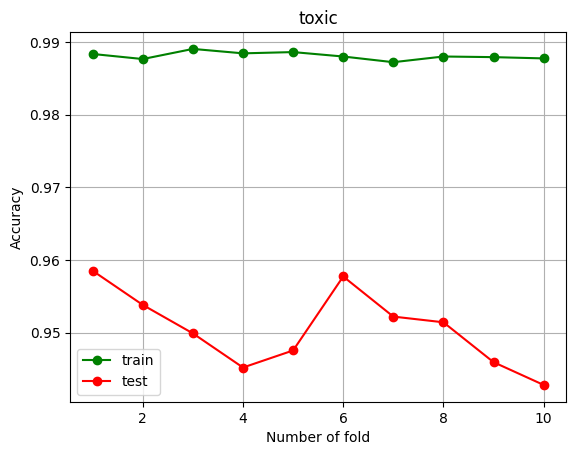

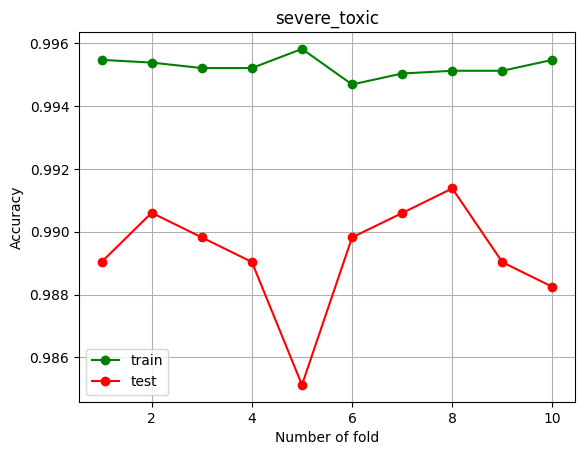

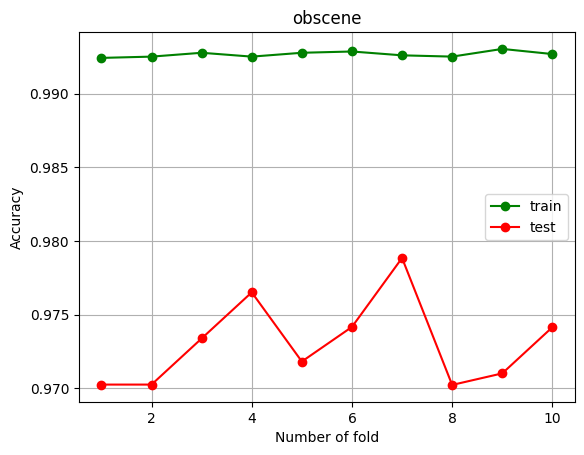

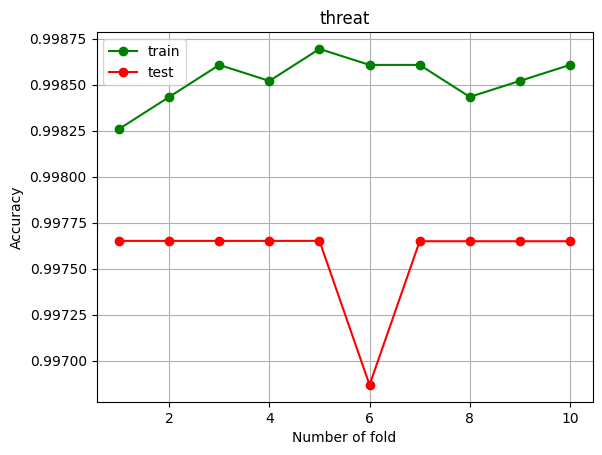

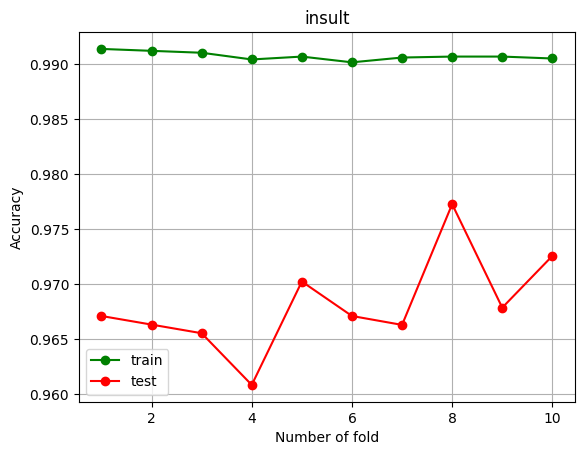

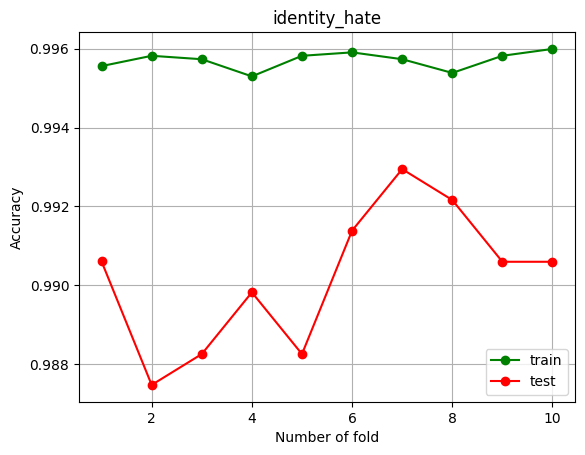

In [ ]:
import matplotlib.pyplot as plt

for label in labels:
    folds = range(1, 11)
    plt.plot(folds, train_accuracy[label], 'o-', color='green', label='train')
    plt.plot(folds, test_accuracy[label], 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.title(label)
    # plt.axis([0.8, 1])
    plt.xlabel('Number of fold')
    plt.ylabel('Accuracy')
    plt.show()